## 01. 로지스틱 회귀

#### 0. k-최근접 분류 (특성에 따른 붓꽃의 종류 분류)

In [11]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
# 1. 붓꽃 데이터 훈련용, 채점용 만들기

iris_data = df[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
iris_target = df[['species']]

In [6]:
# 2. 넣고 섞기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(iris_data, iris_target)

In [7]:
# 3. k-최근접 분류 

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

kn.fit(train_input, train_target)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [8]:
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

0.9732142857142857
0.9473684210526315


In [9]:
kn.predict(test_input)

array(['setosa', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa'], dtype=object)

In [10]:
kn.predict_proba(test_input)       # --> 해석 : 8번째 virginica

array([[1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ]])

#### 1-1 로지스틱 회귀 (여러 특성에 따라 붓꽃의 종류가 세토사인지 버지컬러인지 이진 분류)

In [36]:
# 1. 룬련세트에서 세토사, 버지컬러만 뽑아내기
s_v_indexes = (train_target == 'setosa') | (train_target == 'versicolor')

train_sv = train_input[s_v_indexes['species']]
target_sv = train_target[s_v_indexes['species']]

In [37]:
# 2. 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter = 1000)

lr.fit(train_sv,target_sv)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=20, max_iter=1000)

In [38]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.6696428571428571
0.6578947368421053


In [39]:
print(lr.predict_proba(train_sv[:5]).round(3))

[[0.999 0.001]
 [0.001 0.999]
 [0.998 0.002]
 [0.    1.   ]
 [0.999 0.001]]


#### 1-2 로지스틱 회귀 (다중분류) - 여러 특성에 따라 여러개의 붓꽃의 종류 분류

In [40]:
lr = LogisticRegression(C=20, max_iter = 1000)

lr.fit(train_input, train_target)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=20, max_iter=1000)

In [41]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9821428571428571
0.9736842105263158


In [46]:
lr.predict(train_input)

array(['setosa', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'setosa', 'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 

In [44]:
print(lr.predict_proba(test_input[:5]).round(3))

[[0.    0.994 0.005]
 [0.    0.003 0.997]
 [0.996 0.004 0.   ]
 [0.    0.024 0.976]
 [0.    0.    1.   ]]


In [47]:
lr.coef_.shape

(3, 4)

## 01-(1) 확률적 경사 하강법 
`from sklearn.linear_model import SGDClassifier`

In [48]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
# 1. 붓꽃 데이터 훈련용, 채점용 만들기

iris_data = df[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
iris_target = df[['species']]

In [54]:
# 2. 넣고 섞기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(iris_data, iris_target)

In [55]:
# 3. 확률적 경사 하강법 - 최적의 가중치를 찾고 로지스틱 회귀를 돌림.

from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter = 100)            # loss = log_loss (다중회귀), max_iter : 몇번 반복

sc.fit(train_input, train_target)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', max_iter=100)

In [56]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9821428571428571
0.9736842105263158


#### - 현재 상태에서 이어서 더 반복하고 싶은 경우
- `sc.partial_fit(train_scaled, train_target)`

In [57]:
sc.partial_fit(train_input, train_target)

C:\Users\1-17\Desktop\DAMF2\ml\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', max_iter=100)

In [58]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9821428571428571
0.9736842105263158


## 결정 트리 
- 정규화 과정 필요 없음. 설명하기 쉽고 직관적 !
- `from sklearn.tree import DecisionTreeClassifier`

#### 'sepal_length'	'sepal_width' 'petal_length' 'petal_width'을 기준으로 세토사(0), 버지컬러(1) 이진분류하기

In [68]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
# 1. setosa와 versicolor만 뽑기

st = df[['sepal_length','sepal_width','petal_length','petal_width']]
st['class'] = 0

In [70]:
vc = df[['sepal_length','sepal_width','petal_length','petal_width']]
vc['class'] = 1

In [76]:
# 2. st와 vc의 합치기 : concat

Species = pd.concat([st, vc])
# Species.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1
149,5.9,3.0,5.1,1.8,1


In [77]:
# 3. 훈련, 채점용 데이터 만들기
data = Species[['sepal_length','sepal_width','petal_length','petal_width']]
target = Species[['class']]

In [78]:
# 4. 넣고 섞기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
train_test_split(data, target)

In [85]:
# 5. 결정 트리 사용 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 1)         # 트리의 깊이가 깊을수록 과적합 테스트셋의 성능저하

dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=1)

In [86]:
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.5244444444444445
0.4266666666666667


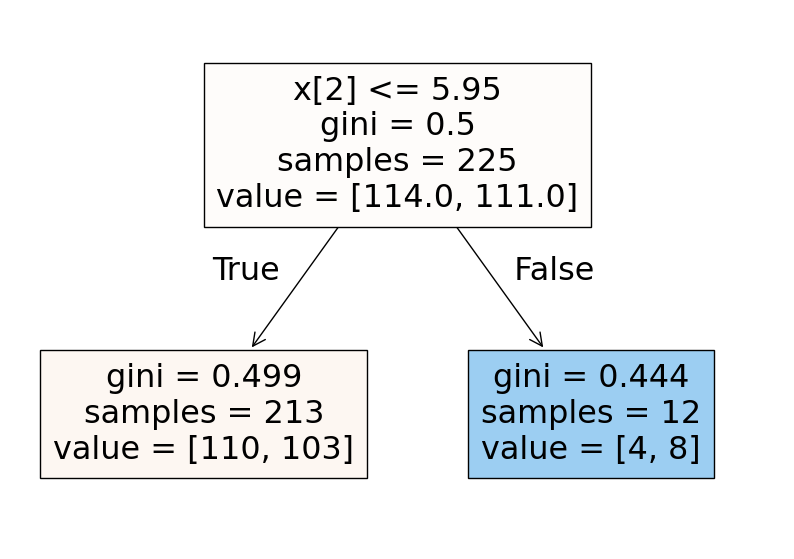

In [87]:
# 6. 결정 트리 시각화
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize = (10,7))            # 가로 10, 세로 7cm / 그림의 크기 지정
plot_tree(dt, max_depth =1, filled = True)             # 가지치기 : max_depth =1 : 앞부분에 있는 결정 트리만 보여줌. (첫번째 분할 트리만 확인할 수 있음.)
plt.show()            